<a href="https://colab.research.google.com/github/tdushio/hello-world/blob/master/sample20230624a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

d= 2 

d= 3 

d= 4 

d= 5 

d= 6 

d= 7 

d= 8 

d= 9 

d= 10 

d= 11 



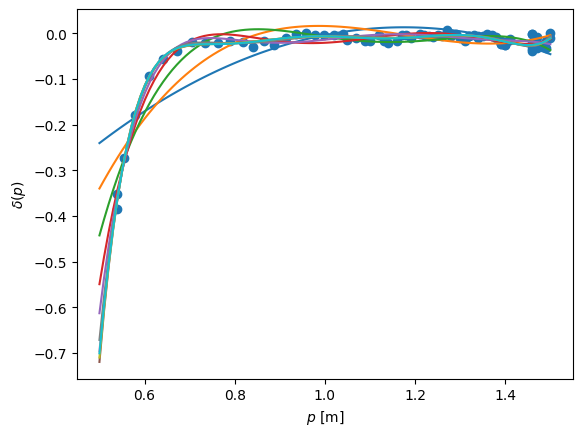

(Text(0.5, 28.0, '$p$ [m]'), Text(28.0, 0.5, '$\\delta(p)$'), None)

In [28]:
import matplotlib.pyplot as plt, numpy as np, math
import pandas as pd

# 訓練データのインポート
imported_data = pd.read_csv('http://www.rokakuho.co.jp/data/books/0172/chapter6.csv')
imported_data = imported_data.values
n = 87
x_data = imported_data[0:n,1]
delta_data = imported_data[0:n,2]
# print(imported_data.shape)
# print(imported_data[0:10,0:3])

# 最適解の計算（単回帰）
## X_data = np.stack((np.ones(n), x_data),1)
## c = np.linalg.pinv(X_data) @ delta_data

#　カーネル関数と行列Kの定義
def kernel_func(x1, x2, d):
  x1d = x2d = 1
  for m in range(d):
    x1d = np.hstack((x1d, x1**(m+1)))
    x2d = np.hstack((x2d, x2**(m+1)))
  return x1d @ x2d

def kernel_matrix(x1, x2, d):
  K = np.empty((len(x1),len(x2)))
  for i in range(len(x1)):
    for j in range(len(x2)):
      K[i,j] =kernel_func(x1[i], x2[j],d)
  return K

# 最適解の計算（多項式回帰）
D = 10;
c = np.empty((len(x_data),D))
delta_sol= np.empty((len(x), D))
for d in range(2,2+D):
  print('d=',d,'\n')
  K = kernel_matrix(x_data, x_data, d)
  c[:,d-2] = np.linalg.pinv(K) @ delta_data
  kx = kernel_matrix(x, x_data, d)
  delta_sol[:,d-2] = kx @ c[:,d-2]

# 学習結果の描画（単回帰）
## x = np.linspace(0.5,1.5,100)
## delta_sol = c[1]*x + c[0]
## fig, ax=plt.subplots()
## ax.plot(x, delta_sol),ax.scatter(x_data, delta_data)
## plt.xlabel('$p$ [m]'), plt.ylabel('$\delta(p)$'), plt.show()
# ax.plot(imported_data[0:n,0:3])
# ax.plot(imported_data[0:n,0])
# ax.plot(imported_data[0:n,1])
#ax.plot(imported_data[0:n,2])

fig, ax = plt.subplots()
ax.plot(x, delta_sol), ax.scatter(x_data, delta_data)
plt.xlabel('$p$ [m]'), plt.ylabel('$\delta(p)$'), plt.show()
